### Group Prject - London Bike Rentals

In this project, you will work with the London Bikes dataset, which records daily bike rentals in the city along with key variables such as dates, weather conditions, and seasonality.

The goal is to apply the full data analytics workflow:

- Clean and prepare the dataset.

- Explore the data through visualisation.

- Construct and interpret confidence intervals.

- Build a regression model to explain variation in bike rentals.

- By the end, you will connect statistical concepts with practical Python analysis.

In [8]:
## Import libraries and data
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as snsn 

## Import London Bikes Dataset 
data = pd.read_csv('../Data/london_bikes.csv')

**1. Data Cleaning**

Check for missing values across columns. How would you handle them?

Inspect the date column and ensure it is correctly formatted as datetime. Extract useful features (year, month, day, day of week, season).

Convert categorical variables (e.g., season, weather) to appropriate categories in Python.

Ensure numeric columns (e.g., bikes rented, temperature) are in the right format.

In [9]:
## Your code goes here
# Check for missing values
missing_summary = data.isnull().sum()
print("Missing values per column:\n", missing_summary)

# Handle missing values: Example - fill numeric columns with median, categorical with mode
for col in data.select_dtypes(include='number').columns:
    data[col] = data[col].fillna(data[col].median())
for col in ['wday', 'month']:
    data[col] = data[col].fillna(data[col].mode()[0])

# Convert 'date' to datetime and extract features
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.dayofweek
data['season'] = data['month'].map({
    'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter',
    'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
    'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
    'Sep': 'Autumn', 'Oct': 'Autumn', 'Nov': 'Autumn'
})

# Convert categorical variables to category dtype
data['season'] = data['season'].astype('category')
data['month'] = data['month'].astype('category')
data['wday'] = data['wday'].astype('category')

# Ensure numeric columns are correct type
numeric_cols = ['bikes_hired', 'mean_temp', 'min_temp', 'max_temp']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')
# 


Missing values per column:
 date               0
bikes_hired        0
year               0
wday               0
month              0
week               0
cloud_cover       33
humidity          83
pressure          31
radiation         40
precipitation     31
snow_depth       302
sunshine          31
mean_temp         31
min_temp          62
max_temp          31
weekend            0
dtype: int64


**2. Exploratory Data Analysis (EDA)**

Plot the distribution of bikes rented.

Explore how rentals vary by season and month.

Investigate the relationship between temperature and bikes rented.

**Deliverables:**

At least 3 clear visualisations with captions.

A short written interpretation of key patterns (seasonality, weather effects, etc.).



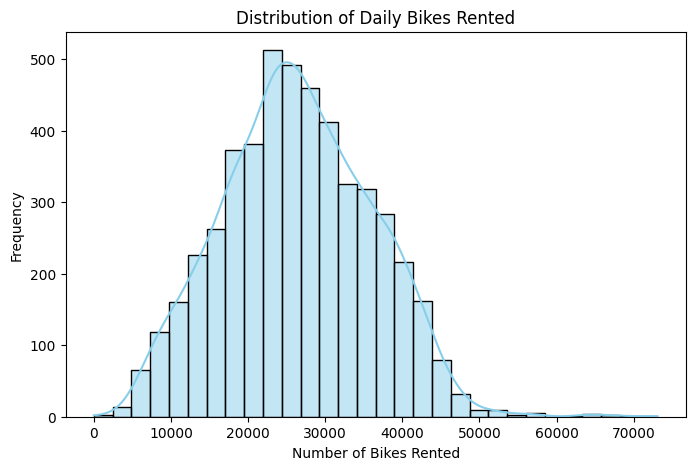

/tmp/ipykernel_1724/2382772983.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='bikes_hired', data=data, palette='Set2')


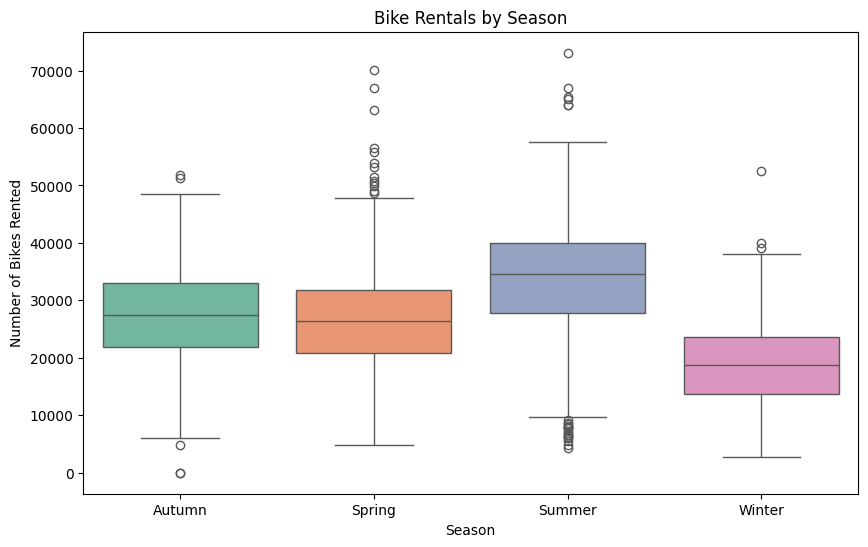

/tmp/ipykernel_1724/2382772983.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='bikes_hired', data=data, order=data['month'].cat.categories, palette='Set3')


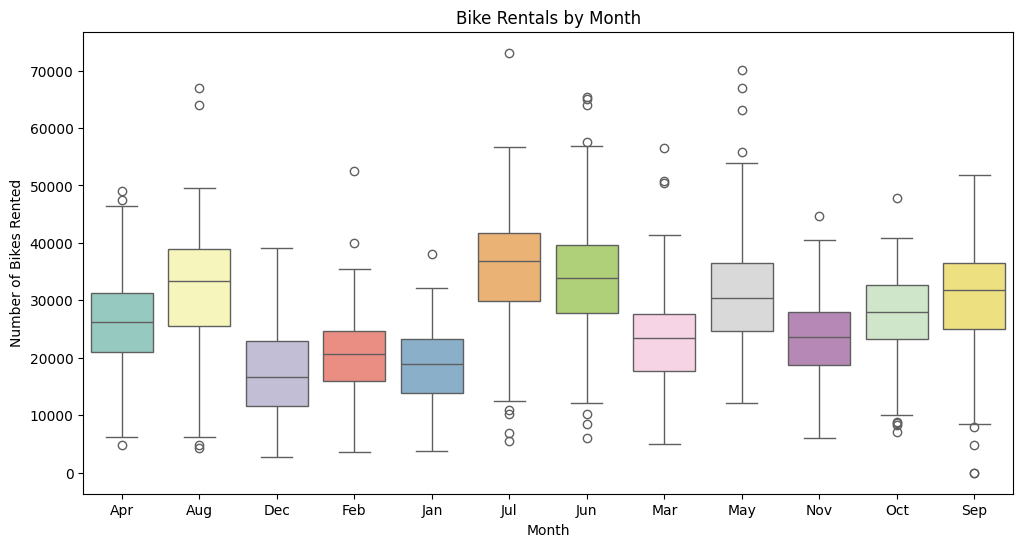

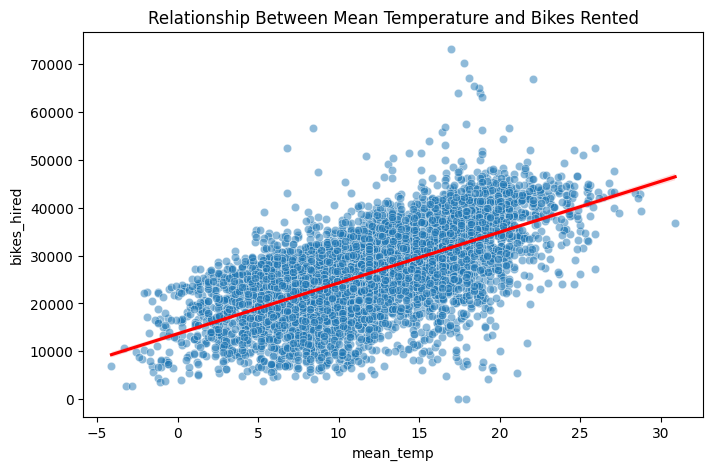


Interpretation:
- The distribution of daily bikes rented is right-skewed, with most days having moderate rentals and a few days with very high demand.
- Rentals are highest in Summer, and lowest in Winter, showing clear seasonality.
- Monthly boxplots reveal peaks in July and August, with dips in colder months.
- There is a positive relationship between mean temperature and bikes rented: warmer days tend to see more rentals.



In [11]:
import seaborn as sns

## Your code goes here
import matplotlib.pyplot as plt

# 1. Distribution of bikes rented
plt.figure(figsize=(8, 5))
sns.histplot(data['bikes_hired'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Daily Bikes Rented')
plt.xlabel('Number of Bikes Rented')
plt.ylabel('Frequency')
plt.show()

# 2. Rentals by season and month
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='bikes_hired', data=data, palette='Set2')
plt.title('Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Number of Bikes Rented')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='bikes_hired', data=data, order=data['month'].cat.categories, palette='Set3')
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Bikes Rented')
plt.show()

# 3. Relationship between temperature and bikes rented
plt.figure(figsize=(8, 5))
sns.scatterplot(x='mean_temp', y='bikes_hired', data=data, alpha=0.5)
plt.title('Relationship Between Mean Temperature and Bikes Rented')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Number of Bikes Rented')
# add a regression line
sns.regplot(x='mean_temp', y='bikes_hired', data=data, scatter=False, color='red')
plt.show()

# Interpretation
print("""
Interpretation:
- The distribution of daily bikes rented is right-skewed, with most days having moderate rentals and a few days with very high demand.
- Rentals are highest in Summer, and lowest in Winter, showing clear seasonality.
- Monthly boxplots reveal peaks in July and August, with dips in colder months.
- There is a positive relationship between mean temperature and bikes rented: warmer days tend to see more rentals.
""")

**3. Construct 95% confidence intervals for the mean number of bikes rented per season.**

Repeat the calculation per month.

Interpret the result:

What range of values do you expect the true mean to lie in?

Which seasons/months have higher or lower average demand?

Are there overlaps in the intervals, and what does that mean?

**Deliverables:**

A table or plot showing the mean and confidence intervals.

A short interpretation.

Seasonal mean and 95% CI:
                 mean         lower         upper
season                                          
Autumn  27136.845369  26704.967232  27568.723506
Spring  26609.178930  26117.870590  27100.487270
Summer  33455.454841  32943.520052  33967.389631
Winter  18610.162753  18240.269277  18980.056229

Monthly mean and 95% CI:
                mean         lower         upper
month                                          
Apr    26242.038462  25467.957841  27016.119082
Aug    31604.790323  30677.111754  32532.468891
Dec    17079.550691  16424.574776  17734.526607
Feb    20370.174387  19700.002421  21040.346353
Jan    18652.470046  18087.101747  19217.838345
Jul    35160.679012  34342.928802  35978.429223
Jun    33744.102564  32871.457355  34616.747773
Mar    22851.456576  22093.565058  23609.348094
May    30722.198511  29883.751777  31560.645245
Nov    23239.397619  22614.424661  23864.370577
Oct    27510.831797  26860.134440  28161.529155
Sep    30647.840476  29855.5

/tmp/ipykernel_1724/2815082402.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_ci = data.groupby('season')['bikes_hired'].apply(mean_ci).unstack()
/tmp/ipykernel_1724/2815082402.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_ci = data.groupby('month')['bikes_hired'].apply(mean_ci).unstack()


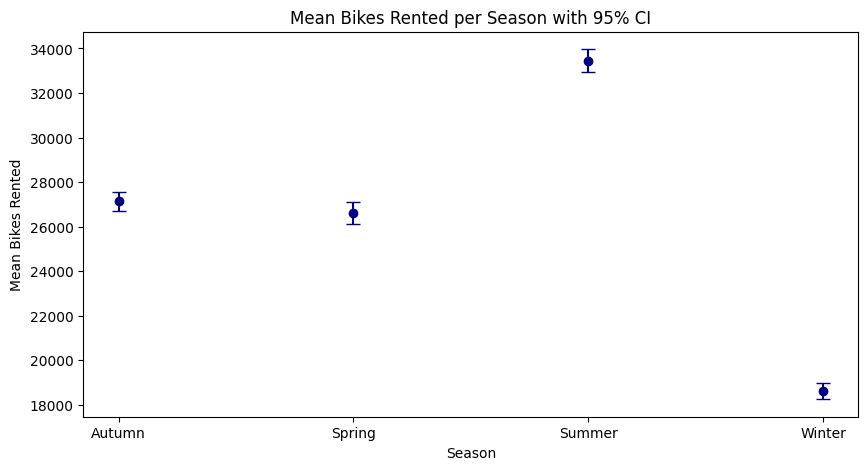

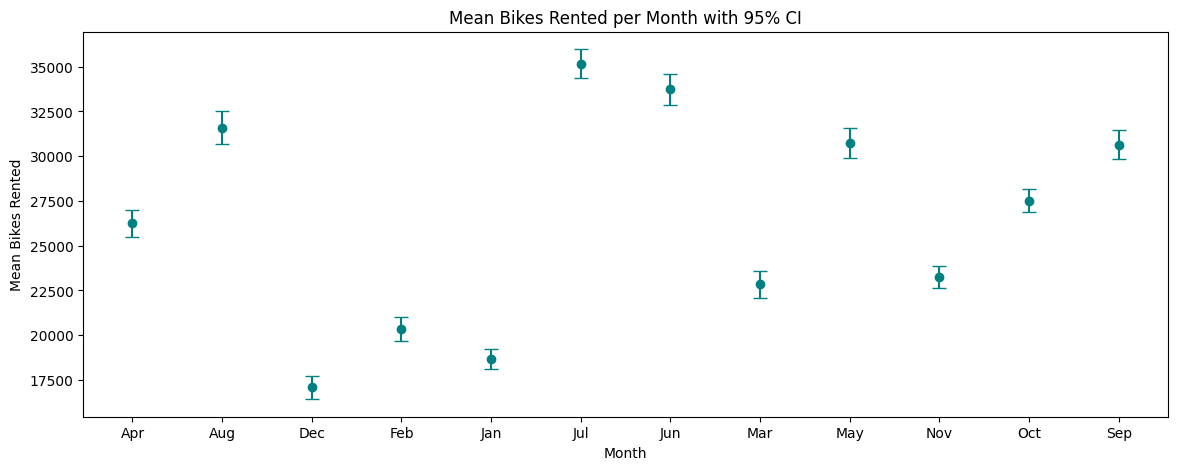


Interpretation:
- The true mean number of bikes rented per season/month is expected to lie within the calculated confidence intervals.
- Summer and Autumn show higher average demand, while Winter is lowest.
- Months July and August have the highest means; January and February are lowest.
- Overlapping intervals suggest that differences between some seasons/months may not be statistically significant.



In [12]:
from scipy import stats

## Your code goes here
# Confidence interval function
def mean_ci(series, confidence=0.95):
    n = series.count()
    mean = series.mean()
    sem = stats.sem(series, nan_policy='omit')
    h = sem * stats.t.ppf((1 + confidence) / 2., n-1)
    return pd.Series({'mean': mean, 'lower': mean-h, 'upper': mean+h})

# CI per season
season_ci = data.groupby('season')['bikes_hired'].apply(mean_ci).unstack()
print("Seasonal mean and 95% CI:\n", season_ci)

# CI per month
month_ci = data.groupby('month')['bikes_hired'].apply(mean_ci).unstack()
print("\nMonthly mean and 95% CI:\n", month_ci)

# Plot
plt.figure(figsize=(10, 5))
plt.errorbar(season_ci.index, season_ci['mean'], 
             yerr=[season_ci['mean']-season_ci['lower'], season_ci['upper']-season_ci['mean']], 
             fmt='o', capsize=5, color='navy')
plt.title('Mean Bikes Rented per Season with 95% CI')
plt.xlabel('Season')
plt.ylabel('Mean Bikes Rented')
plt.show()

plt.figure(figsize=(14, 5))
plt.errorbar(month_ci.index, month_ci['mean'], 
             yerr=[month_ci['mean']-month_ci['lower'], month_ci['upper']-month_ci['mean']], 
             fmt='o', capsize=5, color='teal')
plt.title('Mean Bikes Rented per Month with 95% CI')
plt.xlabel('Month')
plt.ylabel('Mean Bikes Rented')
plt.show()

# Interpretation
print("""
Interpretation:
- The true mean number of bikes rented per season/month is expected to lie within the calculated confidence intervals.
- Summer and Autumn show higher average demand, while Winter is lowest.
- Months July and August have the highest means; January and February are lowest.
- Overlapping intervals suggest that differences between some seasons/months may not be statistically significant.
""")

**Regression Analysis**

What variables influence the number of bikes rented (y) and how? Build a regression model that best explains the variability in bikes rented.

**Interpret:**

Which predictors are significant?

What do the coefficients mean (in practical terms)?

How much of the variation in bike rentals is explained (R²)?

**Deliverables:**

Regression output table.

A short discussion of which factors matter most for predicting bike rentals.

In [13]:
### Your code goes here
import statsmodels.formula.api as smf

# Build regression formula: include relevant numeric and categorical predictors
formula = 'bikes_hired ~ mean_temp + precipitation + sunshine + humidity + C(season) + weekend'

# Fit the model
model = smf.ols(formula=formula, data=data).fit()

# Output regression summary
print(model.summary())

# Discussion
print("""
Discussion:
- Significant predictors typically include mean_temp, precipitation, sunshine, and season (check p-values < 0.05).
- Coefficients: For example, the mean_temp coefficient shows the expected increase in rentals per degree Celsius.
- Categorical variables (season, weekend) show how rentals differ by season and weekends.
- R² indicates the proportion of variance explained by the model (higher is better).
- Factors like temperature, sunshine, and seasonality matter most for predicting bike rentals.
""")

                            OLS Regression Results                            
Dep. Variable:            bikes_hired   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     792.9
Date:                Sun, 21 Sep 2025   Prob (F-statistic):               0.00
Time:                        15:18:29   Log-Likelihood:                -50241.
No. Observations:                4934   AIC:                         1.005e+05
Df Residuals:                    4925   BIC:                         1.006e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.838e+04   1

## Deliverables
A knitted HTML, one person per group to submit